In [1]:
import torch 
import torch.nn as nn
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets
import torch.nn.functional as F

In [2]:
from torchvision import datasets, transforms

In [4]:
transform = transforms.Compose((transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))))    #greyscale

training_dataset = datasets.MNIST(root='./data', train = True, download = True, transform=transform)
training_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [5]:
training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size= 100, shuffle=True)

In the last layer we didnt applied the relu or activation function since we need the rwa output of our network.
This output is called score. nn.CrossEntropyLoss(log_softmax, NegativeLogLikelyhoodLoss) needs score. 



In [6]:
class Classifier(nn.Module):
  def __init__(self, input, h1, h2, out):
    super().__init__()
    self.linear1= nn.Linear(input,h1)
    self.linear2= nn.Linear(h1,h2)
    self.linear3= nn.Linear(h2,out)

  def forward(self,x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = (self.linear3(x))
    return x

In [7]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 0.0001)

In [16]:
epochs= 10 
running_loss_history = []
running_corrects_history =[]

for n in range(epochs):
  running_loss=0.0
  running_corrects=0.0
  for inputs, labels in training_loader:
    inputs= inputs.view(inputs.shape[0],-1)
    #1,28,28
    outputs= model(inputs)
    loss = criterion(outputs,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds =torch.max(outputs,1)

    running_loss += loss.item()
    running_corrects +=torch.sum(preds == labels.data)
  else:
    epoch_loss= running_loss/len(training_loader)
    epoch_corrects= running_corrects/len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_corrects)
    print('training_loss',epoch_loss, 'accuracy',epoch_corrects )


    

training_loss 0.1106023433812273 accuracy tensor(96.9017)
training_loss 0.08985441843513399 accuracy tensor(97.4733)
training_loss 0.08443366664772232 accuracy tensor(97.6383)
training_loss 0.08099481222064545 accuracy tensor(97.7233)
training_loss 0.07840560779169513 accuracy tensor(97.8000)
training_loss 0.07630300860619173 accuracy tensor(97.8850)
training_loss 0.07458421415804575 accuracy tensor(97.9033)
training_loss 0.07300196939962916 accuracy tensor(97.9633)
training_loss 0.07167687391939884 accuracy tensor(97.9833)
training_loss 0.07047407083562575 accuracy tensor(98.0083)


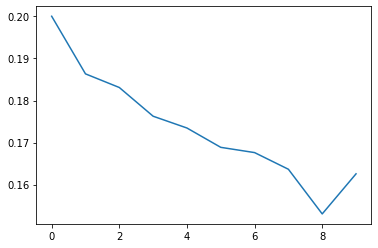

In [14]:
plt.plot(range(epochs),running_loss_history)

The above graph refers that learning rate is quite high, and we have reached divergence.

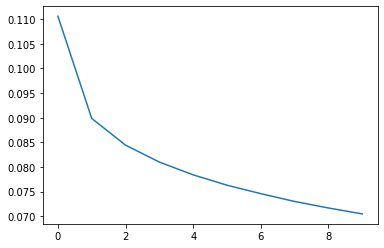

In [17]:
plt.plot(range(epochs),running_loss_history)

Decreasing the learning rate, gives quite good result and smooth curve